# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [1]:
# your code here

!pip install pandas
#!python -m pip install --upgrade pip

You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [2]:
pip install matplotlib

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.pyplot as plt

# DATA PREPARATION

In [4]:
import random
from datetime import datetime, timedelta
import pandas as pd

# Randomly generating data for analysis
def generate_random_data(n):
    categories = ['amazon','netflix','CNN','Elon Musk','google','Trump','harvoxx','coursera',\
                  'techblitz','wwe','uber','meta']
    
    # Making categories randomly sparsed in dataset
    category_sparsity = [random.uniform(0.1, 0.5) for _ in range(len(categories))]
    category_sum = sum(category_sparsity)
    category_probabilities = [sparsity / category_sum for sparsity in category_sparsity]
    
    
    tweet_location = ['US','UK','Nigeria','France','Canada',\
                      'Australia','South Africa','Japan','Switzerland']
    
    # Making locations randomly sparsed in dataset
    loc_sparsity = [random.uniform(0.1, 0.5) for _ in range(len(tweet_location))]
    loc_sum = sum(loc_sparsity)
    loc_probabilities = [sparsity / loc_sum for sparsity in loc_sparsity]

    start_date = datetime(2012, 1, 1)  # Set the possible start date to January 1, 2012
    #start_date2 = datetime(2018, 12, 31)  # Set the possible start date to December 31, 2018
    end_date = datetime.now()   # Set the end date to today

    data_list = []
    
    # Generating random data
    for i in range(n):
        likes = random.randint(0, 10000)
        random_start_date = random.randint(start_date.year, 2018)  # Randomly choose a start year between 2012 and 2018
        random_end_date = datetime(random_start_date + 1, 1, 1)  # Set the end date to the next year
        random_date = start_date + timedelta(days=random.randint(0, (random_end_date - start_date).days))
        retweets = random.randint(0,1000)
        
        if 0.01 < random.random() < 0.02:  # Randomly introduce a blank (missing value)
            random_date = np.nan
        elif 0.02 < random.random() < 0.03:
            likes = np.nan
        elif random.random() < 0.014:
            retweets = np.nan
        
        categories_rndm = random.choices(categories, weights=category_probabilities, k=1)[0]
        country = random.choices(tweet_location, weights=loc_probabilities)[0]
        
        data_list.append({'Date': random_date, 'Category': categories_rndm,\
                          'Likes': likes,'Retweets': retweets, \
                          'Location':country})

    return data_list

n_periods = 10000  # Number of periods

data_list = generate_random_data(n_periods)



In [5]:
# Create a DataFrame from the data list
df = pd.DataFrame(data_list)
df

,Date,Category,Likes,Retweets,Location
0,2012-03-19,CNN,7261.0,768.0,UK
1,2012-05-12,netflix,3265.0,75.0,Australia
2,2013-08-03,wwe,3336.0,773.0,South Africa
3,2013-10-01,google,1779.0,763.0,Australia
4,2012-10-19,Trump,45.0,641.0,Nigeria
...,...,...,...,...,...
9995,2013-05-18,wwe,1037.0,33.0,Canada
9996,2013-07-07,meta,9775.0,423.0,South Africa
9997,2016-02-14,meta,3133.0,647.0,Australia
9998,2012-12-17,CNN,8107.0,449.0,Australia


# DATA CLEANING

In [6]:
# Checking for nulls
df.isnull().sum()

Date        114
Category      0
Likes       104
Retweets    147
Location      0
dtype: int64

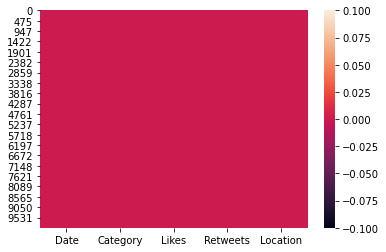

In [7]:
# Removing the nulls
df = df.dropna(subset=['Date','Likes','Retweets'])
sns.heatmap(df.isna())

plt.show()

In [8]:
# Convert the 'Date' field to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert 'Likes' data to integer format
df['Likes'] = df['Likes'].astype(int)
df['Retweets'] = df['Retweets'].astype(int)

# Split 'Date' into separate columns for year, month, and day
df['Year'] = df['Date'].dt.year.astype(str)
df['Month'] = df['Date'].dt.strftime('%B')
df['Day'] = df['Date'].dt.day.astype(str)

# Drop the original 'Date' column
df = df.drop('Date', axis=1)

In [9]:
df.dtypes

Category    object
Likes        int64
Retweets     int64
Location    object
Year        object
Month       object
Day         object
dtype: object

In [30]:
df.head(50)

,Category,Likes,Retweets,Location,Year,Month,Day
0,CNN,7261,768,UK,2012,March,19
1,netflix,3265,75,Australia,2012,May,12
2,wwe,3336,773,South Africa,2013,August,3
3,google,1779,763,Australia,2013,October,1
4,Trump,45,641,Nigeria,2012,October,19
5,CNN,3687,99,Switzerland,2012,July,19
6,uber,9889,267,Switzerland,2012,April,13
7,CNN,4288,762,Australia,2013,March,10
8,Trump,9420,50,US,2016,July,25
10,Trump,1889,526,UK,2012,March,20


In [11]:
df.describe()

,Likes,Retweets
count,9635.000000,9635.000000
mean,4973.995122,497.932122
std,2883.389319,285.779478
min,0.000000,0.000000
25%,2474.500000,253.000000
50%,4938.000000,494.000000
75%,7470.000000,744.000000
max,10000.000000,1000.000000


In [12]:
#Dealing with duplicated rows

df.duplicated().sum()           #counts the number of duplicated rows ...run this before the next line
df.loc[df.duplicated()]        #displays the duplicated rows


,Category,Likes,Retweets,Location,Year,Month,Day


# EXPLORATORY DATA ANALYSIS

In [13]:
# Count the occurrences of each 'Category' element
category_counts = pd.DataFrame(df['Category'].value_counts())
category_counts.columns = ['Counts']
# Print the count of each 'Category' element
print(category_counts)

           Counts
CNN          1284
Trump        1207
techblitz    1108
meta         1003
netflix       840
uber          808
wwe           795
Elon Musk     652
google        582
coursera      505
harvoxx       448
amazon        403



# Which Category had the Highest LIKES and RETWEETS?

In [14]:
from collections import Counter

agg_functions = {'Likes': ['sum','mean','std'], 'Retweets': ['sum','mean','std']}

X = pd.DataFrame(df.groupby('Category').agg(agg_functions).reset_index())

In [15]:
X.columns = ['Category','sum_likes','mean_likes','std_likes','sum_ret','mean_ret','std_ret']

# Find the category with the maximum sum of likes and retweets
category_with_max_likes = X['sum_likes'].idxmax()
category_with_max_retweets = X['sum_ret'].idxmax()

# Retrieve the row with the maximum sum of likes and retweets
result_row = X[X.index == category_with_max_likes]
result_row2 = X[X.index == category_with_max_retweets]

print("Category with the maximum sum of likes:")
print()
print(result_row)
print()

print("Category with the maximum sum of retweets:")
print()
print(result_row2)

Category with the maximum sum of likes:

  Category  sum_likes   mean_likes    std_likes  sum_ret    mean_ret  \
0      CNN    6464116  5034.358255  2942.279504   639639  498.161215   

      std_ret  
0  285.338955  

Category with the maximum sum of retweets:

  Category  sum_likes   mean_likes    std_likes  sum_ret    mean_ret  \
0      CNN    6464116  5034.358255  2942.279504   639639  498.161215   

      std_ret  
0  285.338955  


# Which CATEGORY had the Highest LIKES and RETWEETS for each YEAR?

In [16]:
agg_function = {'Likes': ['max','min'], 'Retweets': ['max','min']}

# Group the DataFrame by 'Year' and 'Category', and calculate the minimum and maximum likes and retweets
Y = pd.DataFrame(df.groupby(['Year','Category'])[['Likes', 'Retweets']].agg(agg_function).reset_index())

Y.columns = ['Year','Category','max_likes','min_likes','max_ret','min_ret']

# Find the row with the maximum and minimum likes for each year
max_likes_row = Y.groupby('Year')['max_likes'].idxmax()
min_likes_row = Y.groupby('Year')['min_likes'].idxmin()

# Find the row with the maximum and minimum likes for each year
max_ret_row = Y.groupby('Year')['max_ret'].idxmax()
min_ret_row = Y.groupby('Year')['min_ret'].idxmin()

# Retrieve the corresponding year and category for the minimum and maximum likes and retweets
min_likes_result = Y.loc[min_likes_row, ['Year', 'Category']]
max_likes_result = Y.loc[max_likes_row, ['Year', 'Category']]
min_retweets_result = Y.loc[min_ret_row, ['Year', 'Category']]
max_retweets_result = Y.loc[max_ret_row, ['Year', 'Category']]


# Perform inner join on all DataFrames
merged_result = min_likes_result.merge(max_likes_result, on=['Year'], how='inner')
merged_result = merged_result.merge(min_retweets_result, on=['Year'], how='inner')
merged_result = merged_result.merge(max_retweets_result, on=['Year'], how='inner')

merged_result.columns = ['Year','Least Liked','Most Liked','Least Retweeted','Most Retweeted']

print("\nYearly Maximum and Minimum Likes and Retweets:")
print()
print(merged_result)


Yearly Maximum and Minimum Likes and Retweets:

   Year Least Liked Most Liked Least Retweeted Most Retweeted
0  2012    coursera    harvoxx             CNN            CNN
1  2013     netflix        CNN          google          Trump
2  2014      google        CNN        coursera            CNN
3  2015   techblitz     google             wwe           uber
4  2016       Trump      Trump           Trump          Trump
5  2017     harvoxx        CNN             CNN           meta
6  2018         wwe        CNN           Trump      techblitz


# What YEAR was Each CATEGORY Mostly Engaged?

In [17]:
#agg_function = {'Likes': ['max','min'], 'Retweets': ['max','min']}

# Group the DataFrame by 'Year' and 'Category', and calculate the minimum likes and retweets
Z = pd.DataFrame(df.groupby(['Year','Category'])[['Likes', 'Retweets']].agg('sum').reset_index())

# Find the row with the minimum and maximum likes for each category
min_likes_row = Z.groupby('Category')['Likes'].idxmin()
max_likes_row = Z.groupby('Category')['Likes'].idxmin()

# Find the row with the minimum and maximum retweets for each category
min_retweets_row = Z.groupby('Category')['Retweets'].idxmin()
max_retweets_row = Z.groupby('Category')['Retweets'].idxmin()

# Retrieve the corresponding year and category for the minimum likes and retweets
min_likes_result = Z.loc[min_likes_row, ['Category', 'Year']]
min_retweets_result = Z.loc[min_retweets_row, ['Category', 'Year']]

# Retrieve the corresponding year and category for the maximum likes and retweets
max_likes_result = Z.loc[max_likes_row, ['Category', 'Year']]
max_retweets_result = Z.loc[max_retweets_row, ['Category', 'Year']]

# Perform inner join on all DataFrames
merged_result = min_likes_result.merge(max_likes_result, on=['Category'], how='inner')
merged_result = merged_result.merge(min_retweets_result, on=['Category'], how='inner')
merged_result = merged_result.merge(max_retweets_result, on=['Category'], how='inner')

merged_result.columns = ['Category','Least Liked','Most Liked','Least Retweeted','Most Retweeted']

print("Yearly Maximum and Minimum Likes and Retweets:")
print()
print(merged_result)

Yearly Maximum and Minimum Likes and Retweets:

     Category Least Liked Most Liked Least Retweeted Most Retweeted
0         CNN        2018       2018            2018           2018
1   Elon Musk        2018       2018            2018           2018
2       Trump        2018       2018            2018           2018
3      amazon        2018       2018            2018           2018
4    coursera        2018       2018            2018           2018
5      google        2018       2018            2018           2018
6     harvoxx        2018       2018            2018           2018
7        meta        2018       2018            2018           2018
8     netflix        2018       2018            2018           2018
9   techblitz        2018       2018            2018           2018
10       uber        2018       2018            2018           2018
11        wwe        2018       2018            2018           2018


The EDA used in this process was designed the reveal the strength and popularity of tweets in location and time. It shows which categories were most popular around the world and at what times over the years.

# VISUALIZATIONS

# Most Popular CATEGORIES

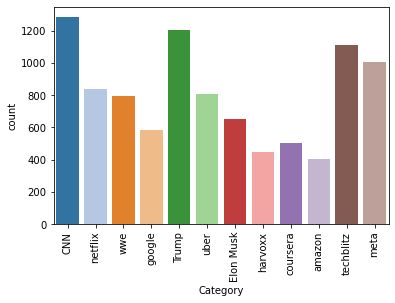

In [18]:
#PLots of uniques in categories

CTplot=sns.countplot(data=df,x='Category',palette='tab20')

CTplot.set_xticklabels(CTplot.get_xticklabels(),rotation=90)

plt.show()

# LOCATION Most Tweeted from

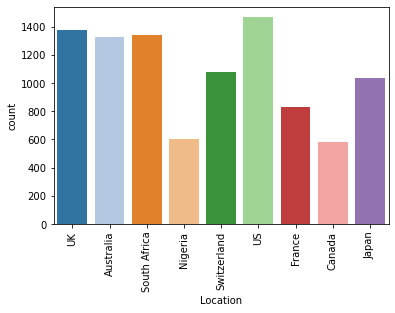

In [19]:
#Plots of uniques in location

CTplot=sns.countplot(data=df,x='Location',palette='tab20')

CTplot.set_xticklabels(CTplot.get_xticklabels(),rotation=90)

plt.show()

# Most Engaging COUNTRY

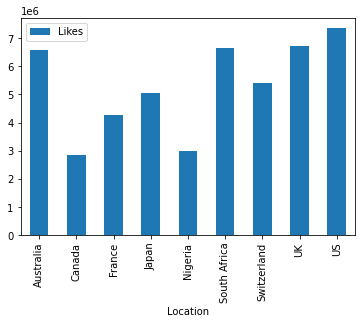

In [20]:
#Sum of likes per location
df_lik=df.groupby('Location').Likes.sum()

df_col_plot=pd.DataFrame(df_lik)
df_col_plot.plot.bar()

plt.show()

# COUNTRY Most Likely to retweet

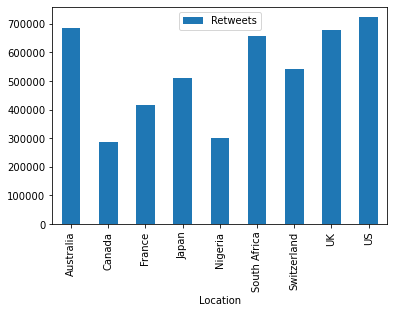

In [21]:
#Total Retweets per location
df_ret = df.groupby('Location').Retweets.sum()

df_col_plot=pd.DataFrame(df_ret)
df_col_plot.plot.bar()

plt.show()

# Outliers

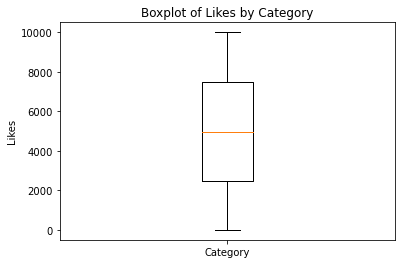

In [22]:
# Create the boxplot
plt.boxplot(df['Likes'])
plt.ylabel('Likes')
plt.title('Boxplot of Likes by Category')

# Set the x-axis tick labels
plt.xticks([1], ['Category'])

# Display the plot
plt.show()

# Most Engaged CATEGORY

Mean of 'Likes': 4974.0

Mean of 'Likes' by Category (sorted in decreasing order):

Category
netflix    5182.35
wwe        5151.27
CNN        5034.36
Trump      4987.08
harvoxx    4973.40
Name: Likes, dtype: float64


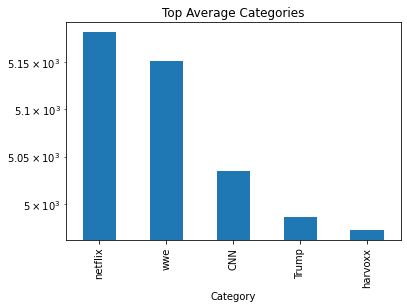

In [23]:
# Mean of the 'Likes' category
like_mean = df['Likes'].mean()
likes_mean = round(like_mean,2)
print("Mean of 'Likes':", likes_mean)
print()

# Mean of each category's 'Likes' sorted in increasing order
category_likes_mean = df.groupby('Category')['Likes'].mean().round(2).sort_values(ascending=False).nlargest(5)
print("Mean of 'Likes' by Category (sorted in decreasing order):")
print()
print(category_likes_mean)

category_likes_mean.plot(kind = 'bar', logy = True, title = 'Top Average Categories')

plt.show()

# Most Liked Tweets

In [24]:
# Get the top 10 rows with the highest 'Likes' values
top_10_highest = df.nlargest(10, 'Likes')

top10 = top_10_highest[['Category','Likes','Retweets','Location','Year']]
print("Top 10 rows with highest 'Likes' values:")
print()
print(top10)



Top 10 rows with highest 'Likes' values:

       Category  Likes  Retweets     Location  Year
6933    harvoxx  10000       553           US  2012
4986    netflix   9998       802  Switzerland  2012
3693     google   9996       952    Australia  2015
4196       uber   9996       724           UK  2012
6665        CNN   9994       540           UK  2018
8575   coursera   9994       866           US  2012
9361        CNN   9994       834           UK  2013
7873      Trump   9993       830      Nigeria  2012
8732    netflix   9993       636       France  2013
807   techblitz   9989       597  Switzerland  2018


# Average RETWEETS in COUNTRY

Mean of 'Location' retweets: 497.9321224701609

Mean of 'retweets' by location (sorted in decreasing order):

Location
Australia      516.98
Switzerland    502.40
France         499.79
Nigeria        498.42
Name: Retweets, dtype: float64


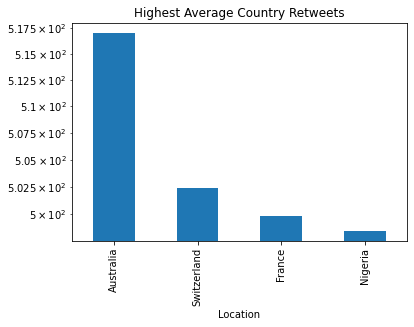

In [25]:
# Mean of the 'Retweets' category
retweets_mean = df['Retweets'].mean()
print("Mean of 'Location' retweets:", retweets_mean)

# Mean of each category's 'Retweets' sorted in increasing order
retweets_likes_mean = df.groupby('Location')['Retweets'].mean().round(2).sort_values(ascending=False).nlargest(4)
print()
print("Mean of 'retweets' by location (sorted in decreasing order):")
print()
print(retweets_likes_mean)

retweets_likes_mean.plot(kind = 'bar', logy = True, title = 'Highest Average Country Retweets')

plt.show()

# %Percentage LIKES and RETWEETS across all YEARS

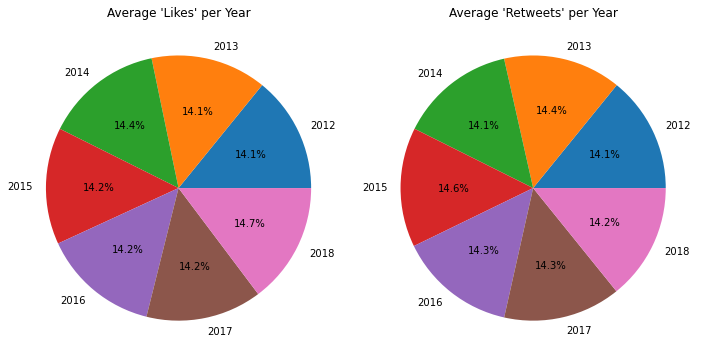

In [26]:
# Mean of each year's 'Likes' and 'Retweets' sorted in increasing order
retweets_likes_mean = df.groupby('Year')[['Likes','Retweets']].mean()

# Create the subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot graph 1 as a pie chart of the mean likes in different years
pie1 = retweets_likes_mean['Likes']
axes[0].pie(pie1, labels=pie1.index, autopct='%1.1f%%')
axes[0].set_title("Average 'Likes' per Year")

# Plot graph 2 as a pie chart of the mean retweets in different years
pie2 = retweets_likes_mean['Retweets']
axes[1].pie(pie2, labels=pie2.index, autopct='%1.1f%%')
axes[1].set_title("Average 'Retweets' per Year")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the combined plot
plt.show()

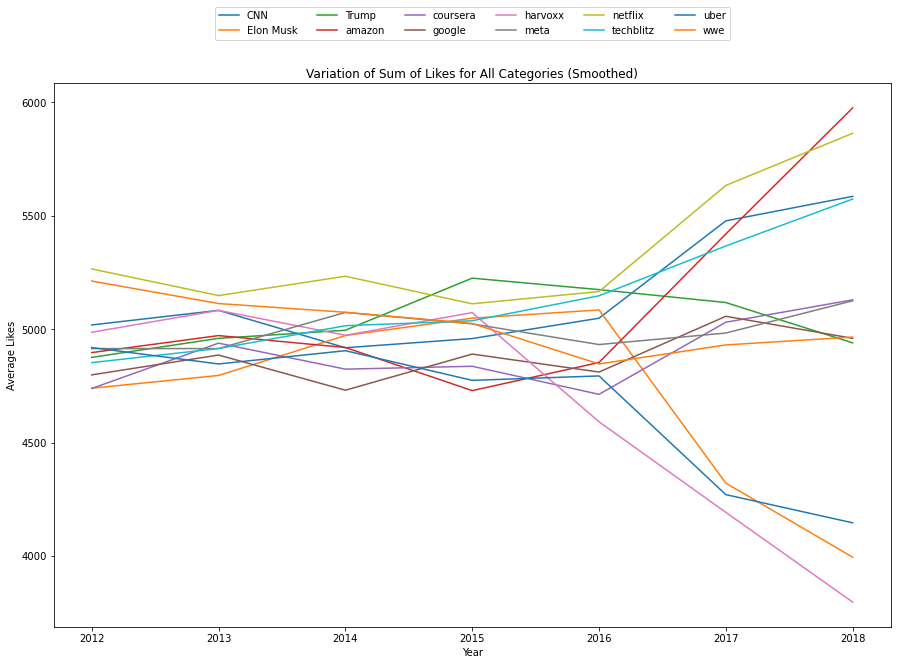

In [40]:
# Group the data by 'Year' and 'Category' and calculate the average likes
likes_by_year_category = df.groupby(['Year', 'Category'])['Likes'].mean().reset_index()

# Pivot the data to have 'Year' as the index and 'Category' as columns
pivot_table = likes_by_year_category.pivot(index='Year', columns='Category', values='Likes')

# Smooth the data using moving average with a window size of 3
smoothed_data = pivot_table.rolling(window=3, min_periods=1, center=True).mean()

# Plot the smoothed data for all categories on a single plot
plt.figure(figsize=(15, 10))

# Iterate over each column (category) in the smoothed data
for column in smoothed_data.columns:
    plt.plot(smoothed_data.index, smoothed_data[column], label=column)

plt.xlabel('Year')
plt.ylabel('Average Likes')
plt.title('Variation of Average Likes for All Categories (Smoothed)')
plt.legend(ncol=6, loc='upper center', bbox_to_anchor=(0.5, 1.15))
plt.show()

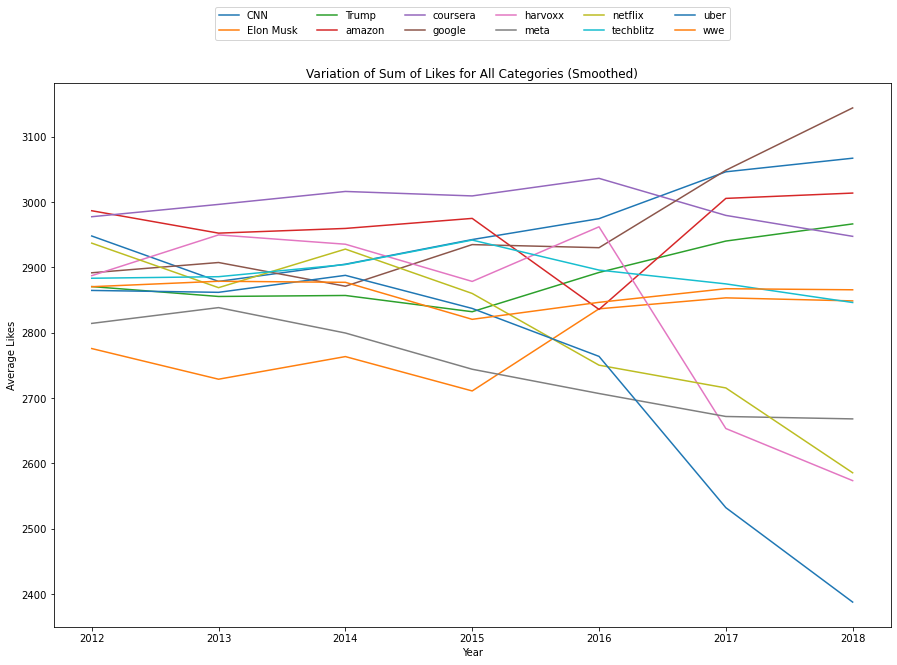

In [42]:
# Group the data by 'Year' and 'Category' and calculate the average likes
likes_by_year_category = df.groupby(['Year', 'Category'])['Likes'].std().reset_index()

# Pivot the data to have 'Year' as the index and 'Category' as columns
pivot_table = likes_by_year_category.pivot(index='Year', columns='Category', values='Likes')

# Smooth the data using moving average with a window size of 3
smoothed_data = pivot_table.rolling(window=4, min_periods=1, center=True).mean()

# Plot the smoothed data for all categories on a single plot
plt.figure(figsize=(15, 10))

# Iterate over each column (category) in the smoothed data
for column in smoothed_data.columns:
    plt.plot(smoothed_data.index, smoothed_data[column], label=column)

plt.xlabel('Year')
plt.ylabel('Deviation from Average')
plt.title('Variation from Average Likes for All Categories (Smoothed)')
plt.legend(ncol=6, loc='upper center', bbox_to_anchor=(0.5, 1.15))
plt.show()